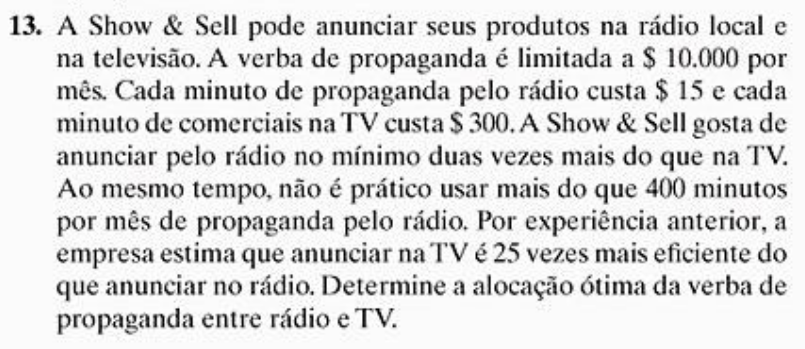

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Alocacao_Otima_Propaganda_ShowAndSell')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos meios de propaganda para referência
meios = ['radio', 'tv']

# Dados financeiros e operacionais
orcamento_total = 10000
custo_por_minuto = {'radio': 15, 'tv': 300}
limite_max_radio = 400 # minutos

# A métrica de "eficiência" é relativa.
# A TV é 25 vezes mais eficiente que o rádio.
# Definimos a eficiência do rádio como 1 e a da TV como 25.
pontos_eficiencia = {'radio': 1, 'tv': 25}

In [4]:
# 1. Variáveis de Decisão
# Minutos a serem alocados para cada meio
minutos_alocados = model.continuous_var_dict(meios, name='Minutos')


# 2. Função Objetivo
# Maximizar a eficiência total da propaganda
expressao_eficiencia = (pontos_eficiencia[m] * minutos_alocados[m] for m in meios)
soma_eficiencia_total = model.sum(expressao_eficiencia)
model.maximize(soma_eficiencia_total)


# 3. Restrições

# Restrição 1: Orçamento Total
# O custo total com rádio e TV não pode exceder $10.000.
expressao_custo = (custo_por_minuto[m] * minutos_alocados[m] for m in meios)
soma_custo_total = model.sum(expressao_custo)
restr_orcamento_logica = soma_custo_total <= orcamento_total
model.add_constraint(restr_orcamento_logica, ctname='limite_orcamento')

# Restrição 2: Mix de Meios
# Minutos de rádio devem ser no mínimo o dobro dos minutos de TV (R >= 2T).
restr_ratio_RT_logica = minutos_alocados['radio'] - 2 * minutos_alocados['tv'] >= 0
model.add_constraint(restr_ratio_RT_logica, ctname='ratio_radio_tv')

# Restrição 3: Limite Máximo de Rádio
# Não usar mais de 400 minutos de rádio.
restr_max_radio_logica = minutos_alocados['radio'] <= limite_max_radio
model.add_constraint(restr_max_radio_logica, ctname='limite_max_radio')

docplex.mp.LinearConstraint[limite_max_radio](Minutos_radio,LE,400)

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 2 rows, 2 columns, and 4 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Scaled dual infeas =             0.499999

------ SOLUÇÃO ÓTIMA ------

solution for: Alocacao_Otima_Propaganda_ShowAndSell
objective: 818.182
status: OPTIMAL_SOLUTION(2)
Minutos_radio=60.606
Minutos_tv=30.303

